# <span style="color:red; font-family: Arial;">Random Forest - Fraudcheck data</span>

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report , confusion_matrix
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10,5)

# 1 - Business Problem

<h3 style="color:blue; font-family: Arial;">Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good" </h3>

# 2 - Data collection 

In [2]:
df = pd.read_csv('./Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.rename(columns={'Marital.Status':'MaritalStatus',
                  'Taxable.Income':'TaxableIncome',
                  'City.Population':'CityPopulation',
                  'Work.Experience':'WorkExperience'
                  },inplace=True)
df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


<h3 style="color:black; font-family: Arial;"> target column</h3>

*As given in problem statement treating those who have taxable_income <= 30000 as "Risky" and others are "Good"*

In [4]:
df['Target'] = df['TaxableIncome'].apply(lambda x : "Risky" if x <=30000 else "Good")

In [5]:
df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban,Target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


# 3- Visualization

<Axes: xlabel='WorkExperience', ylabel='TaxableIncome'>

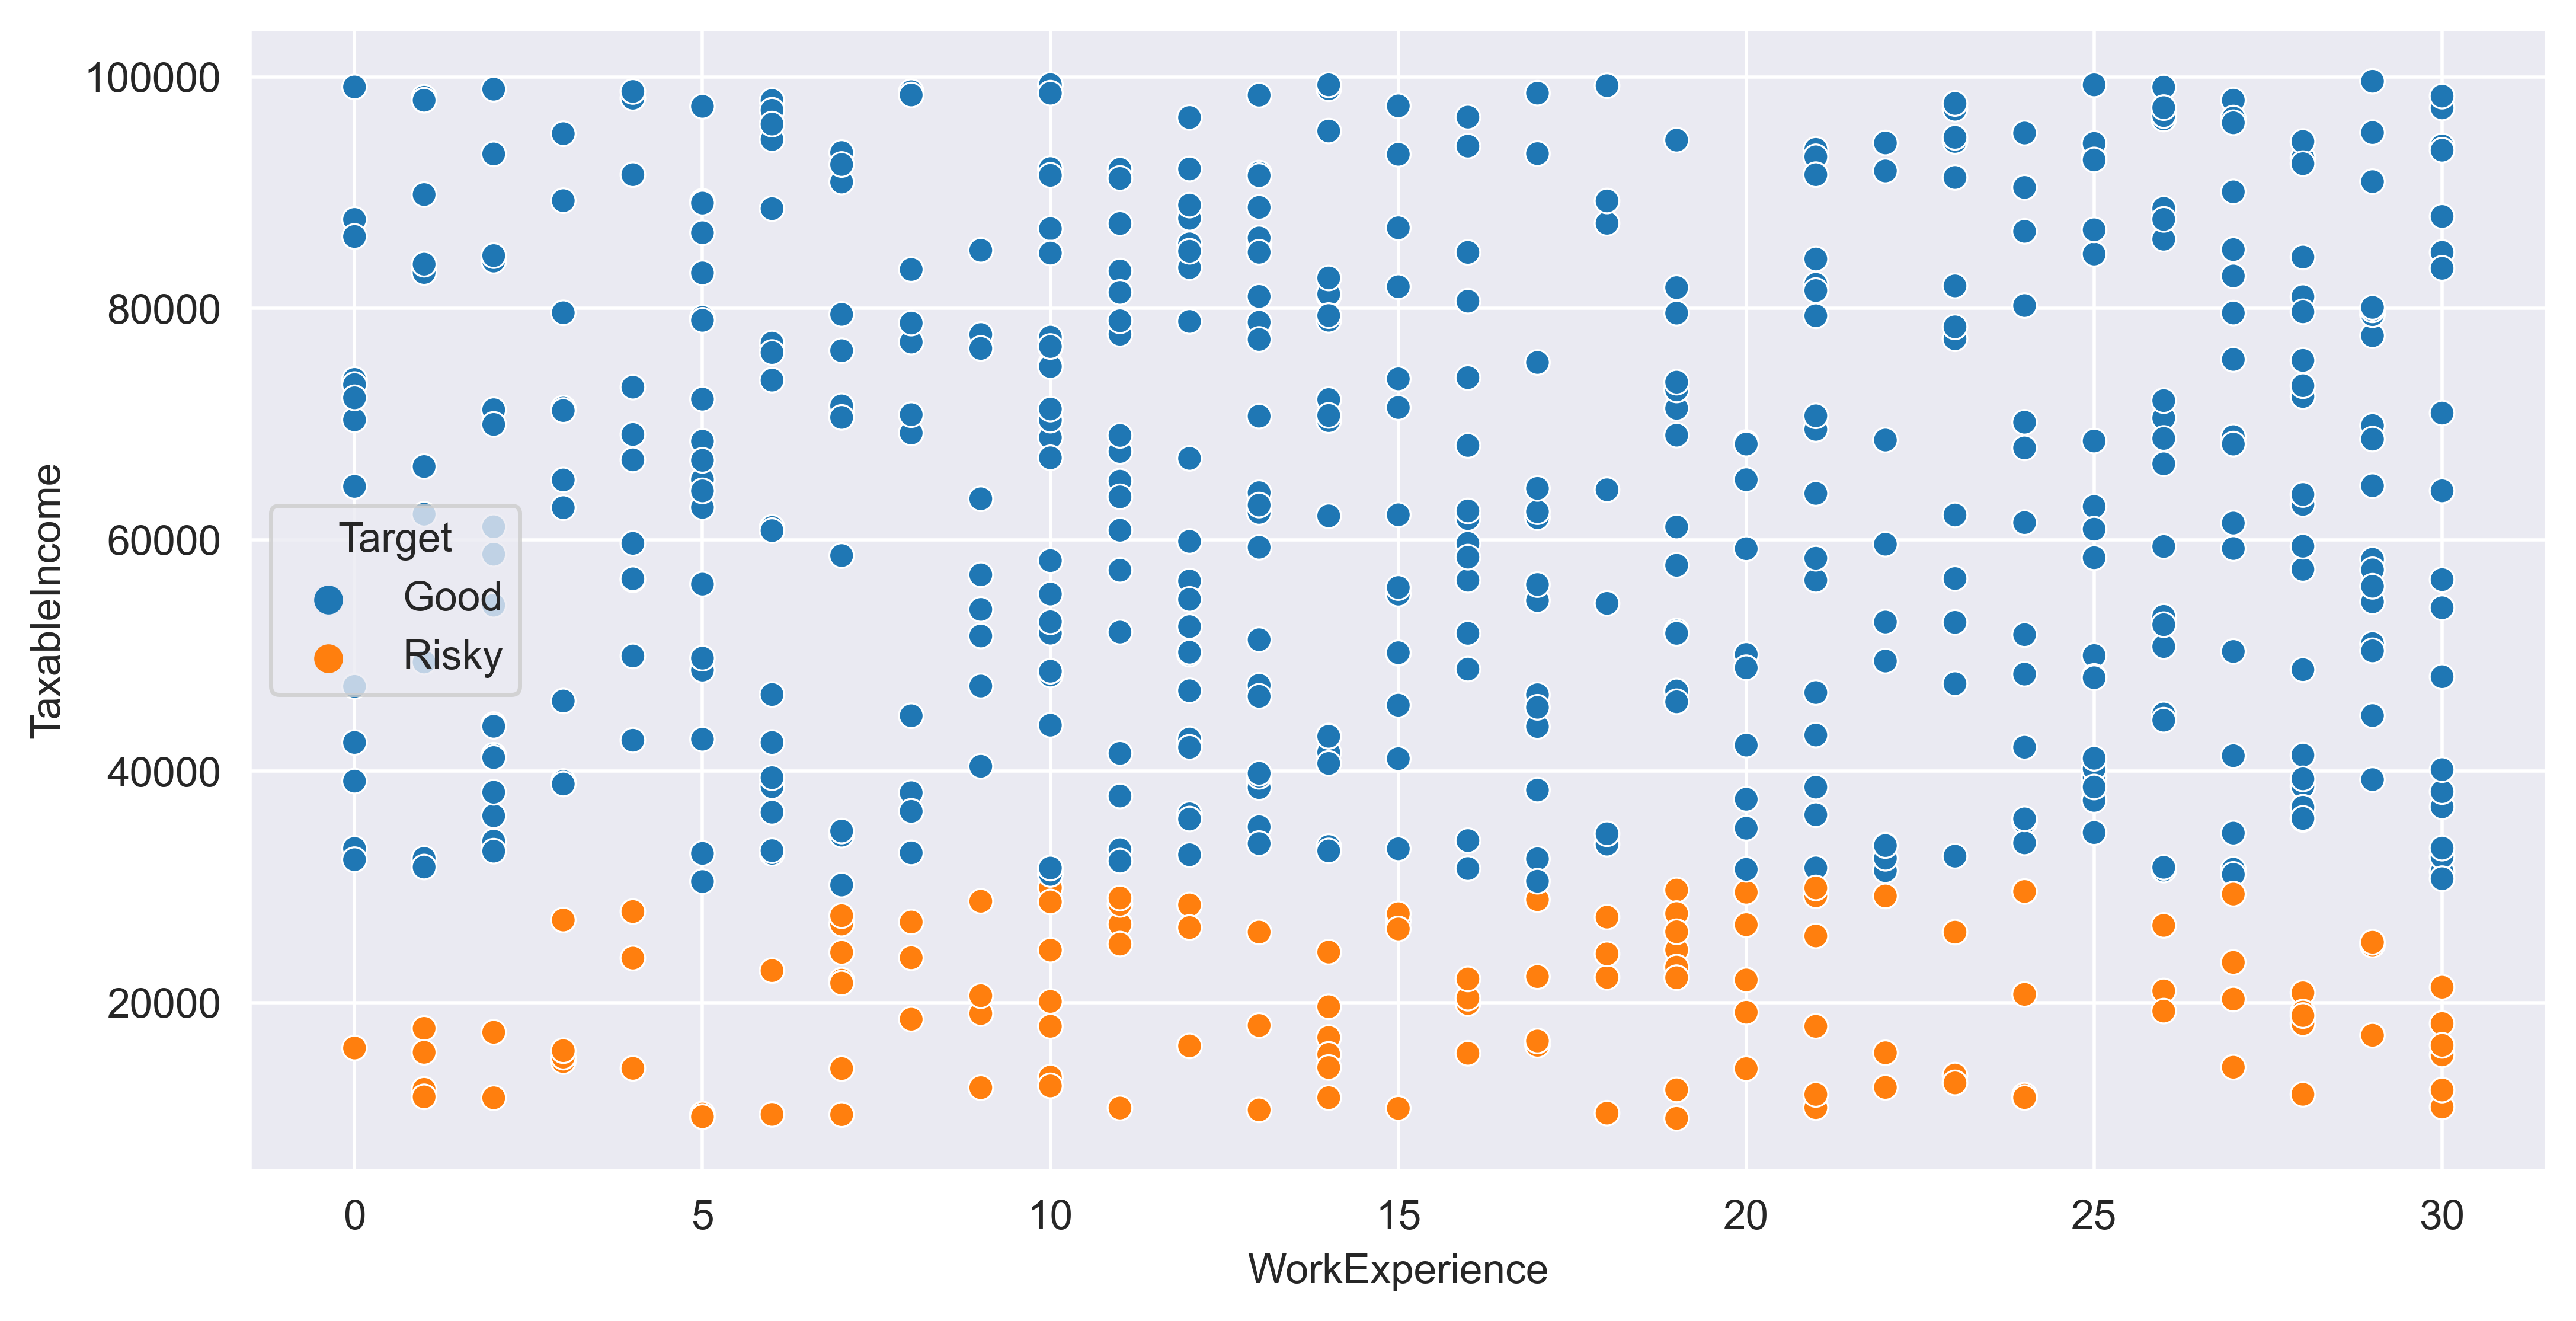

In [6]:
sns.scatterplot(x=df['WorkExperience'],y=df['TaxableIncome'],hue=df['Target'])

Text(0.5, 1.0, 'Classes count')

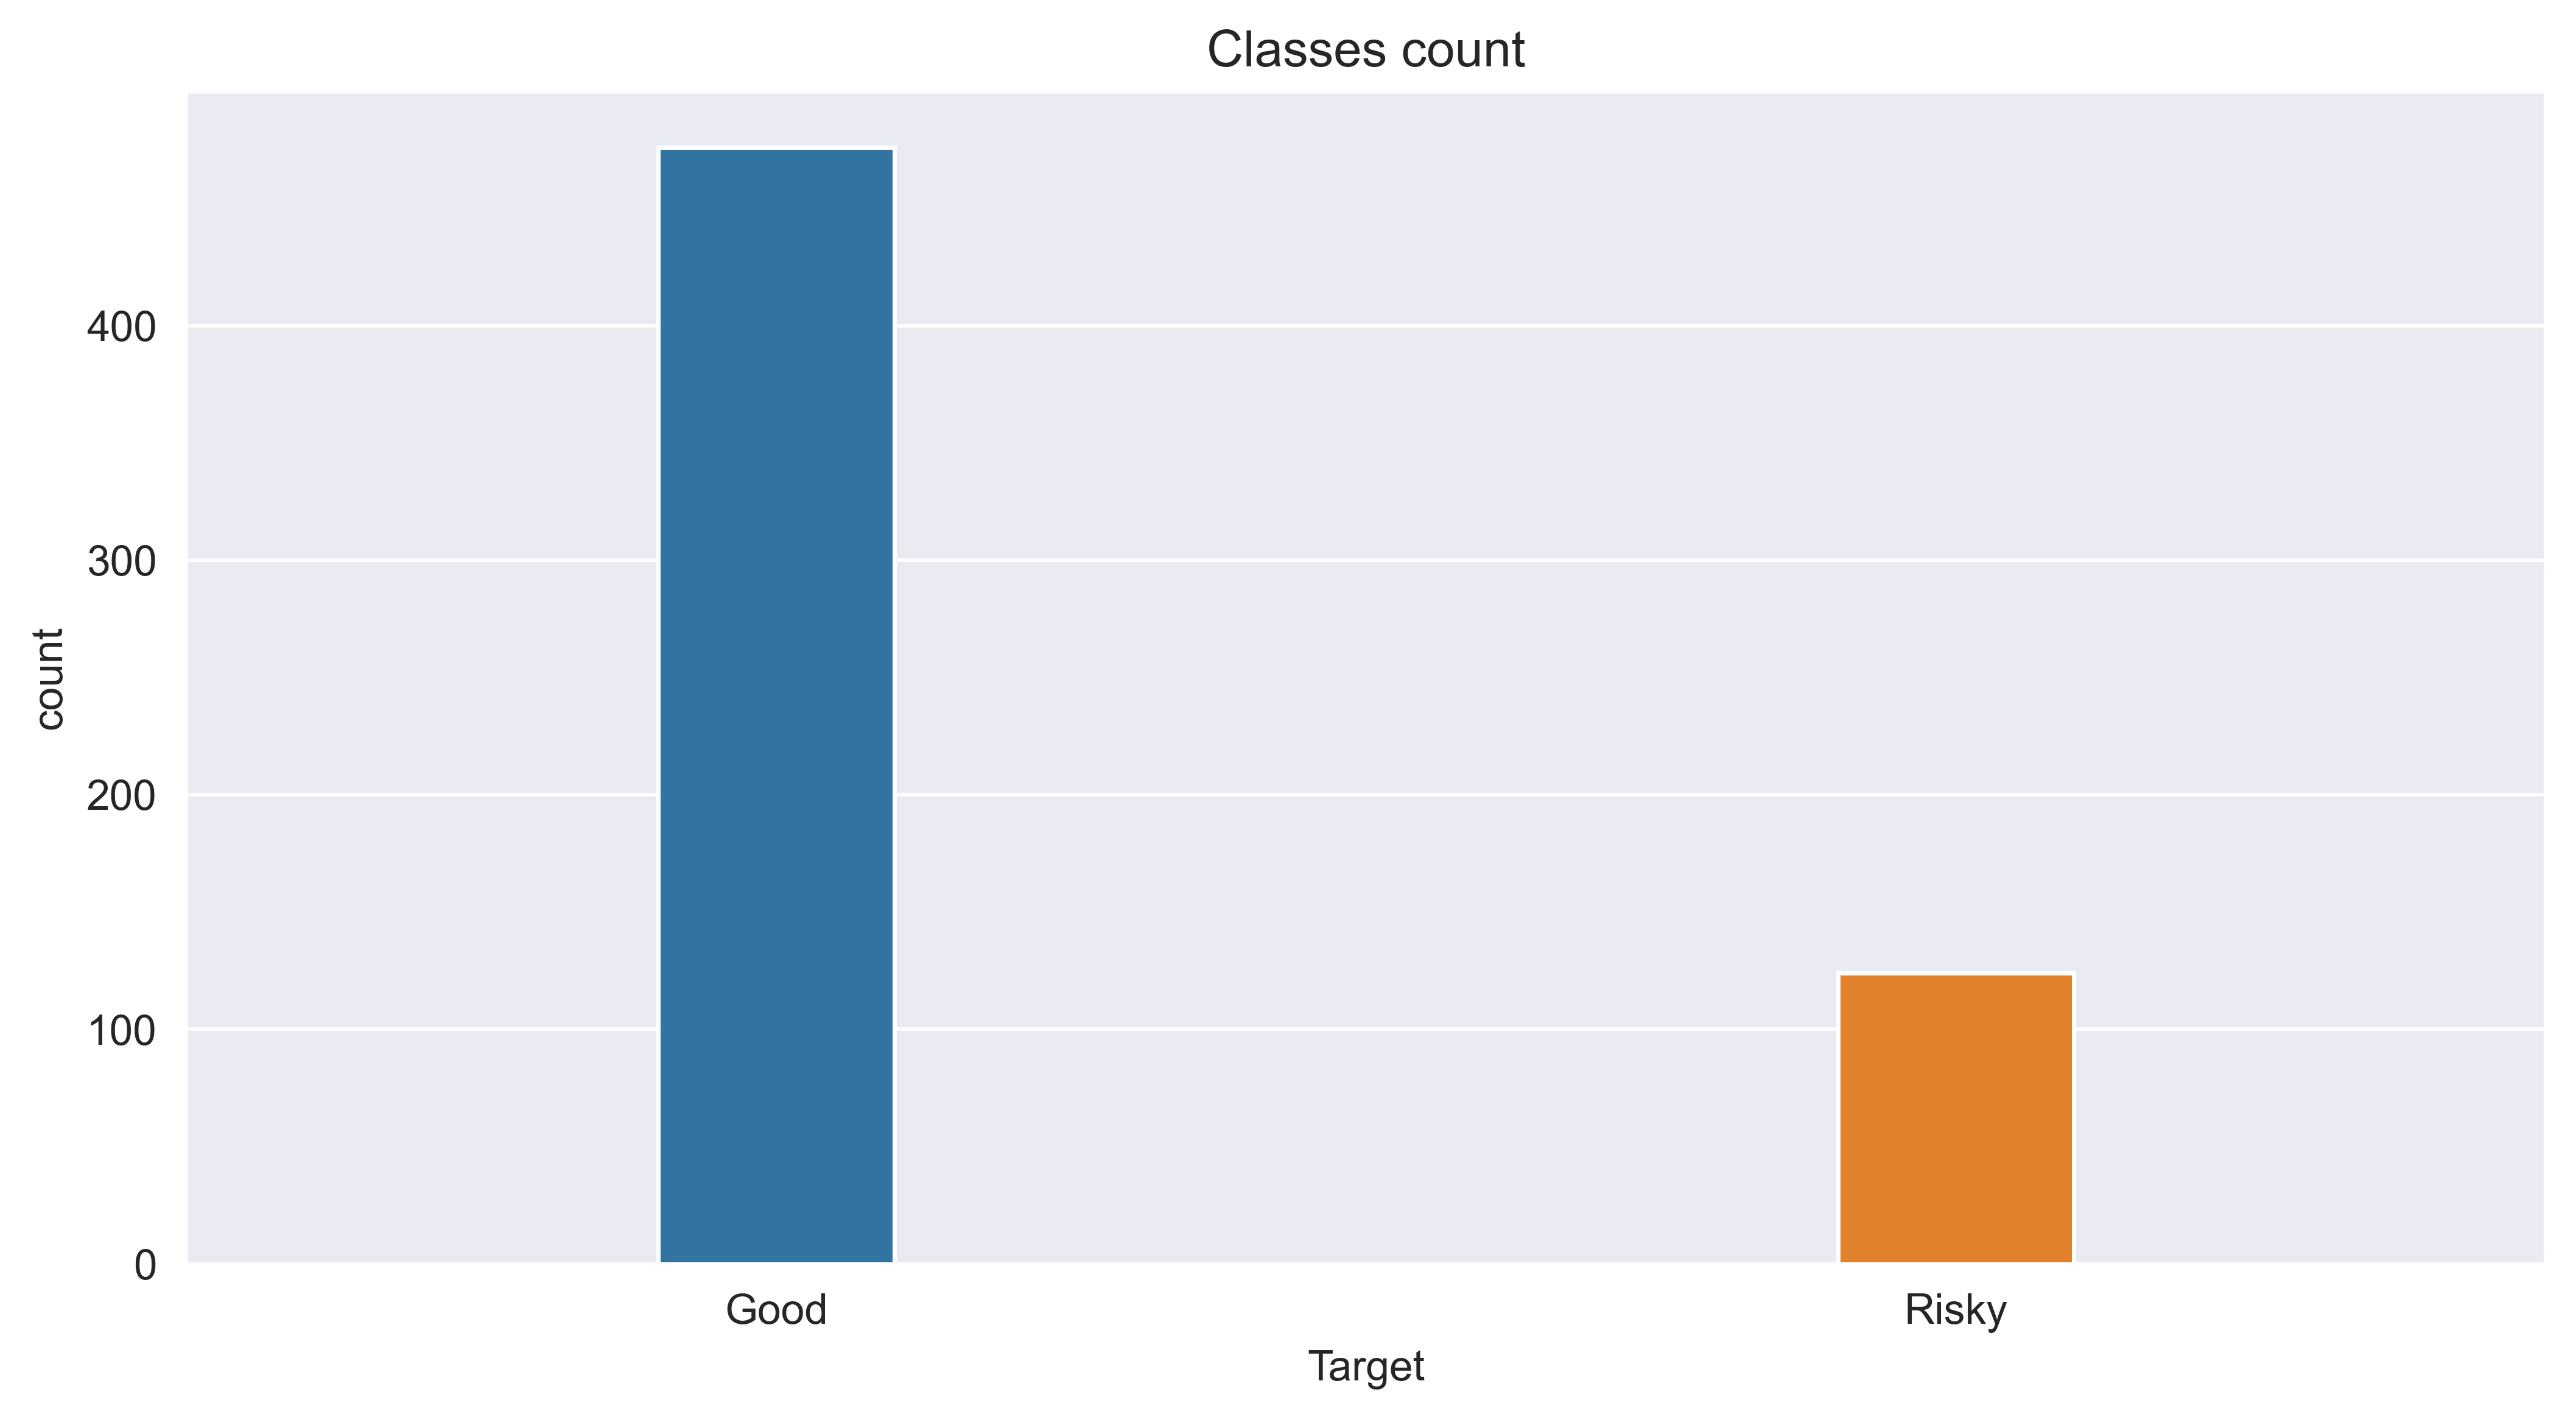

In [7]:
sns.countplot(data=df,x='Target',width=0.2)
plt.title('Classes count')

<Axes: ylabel='count'>

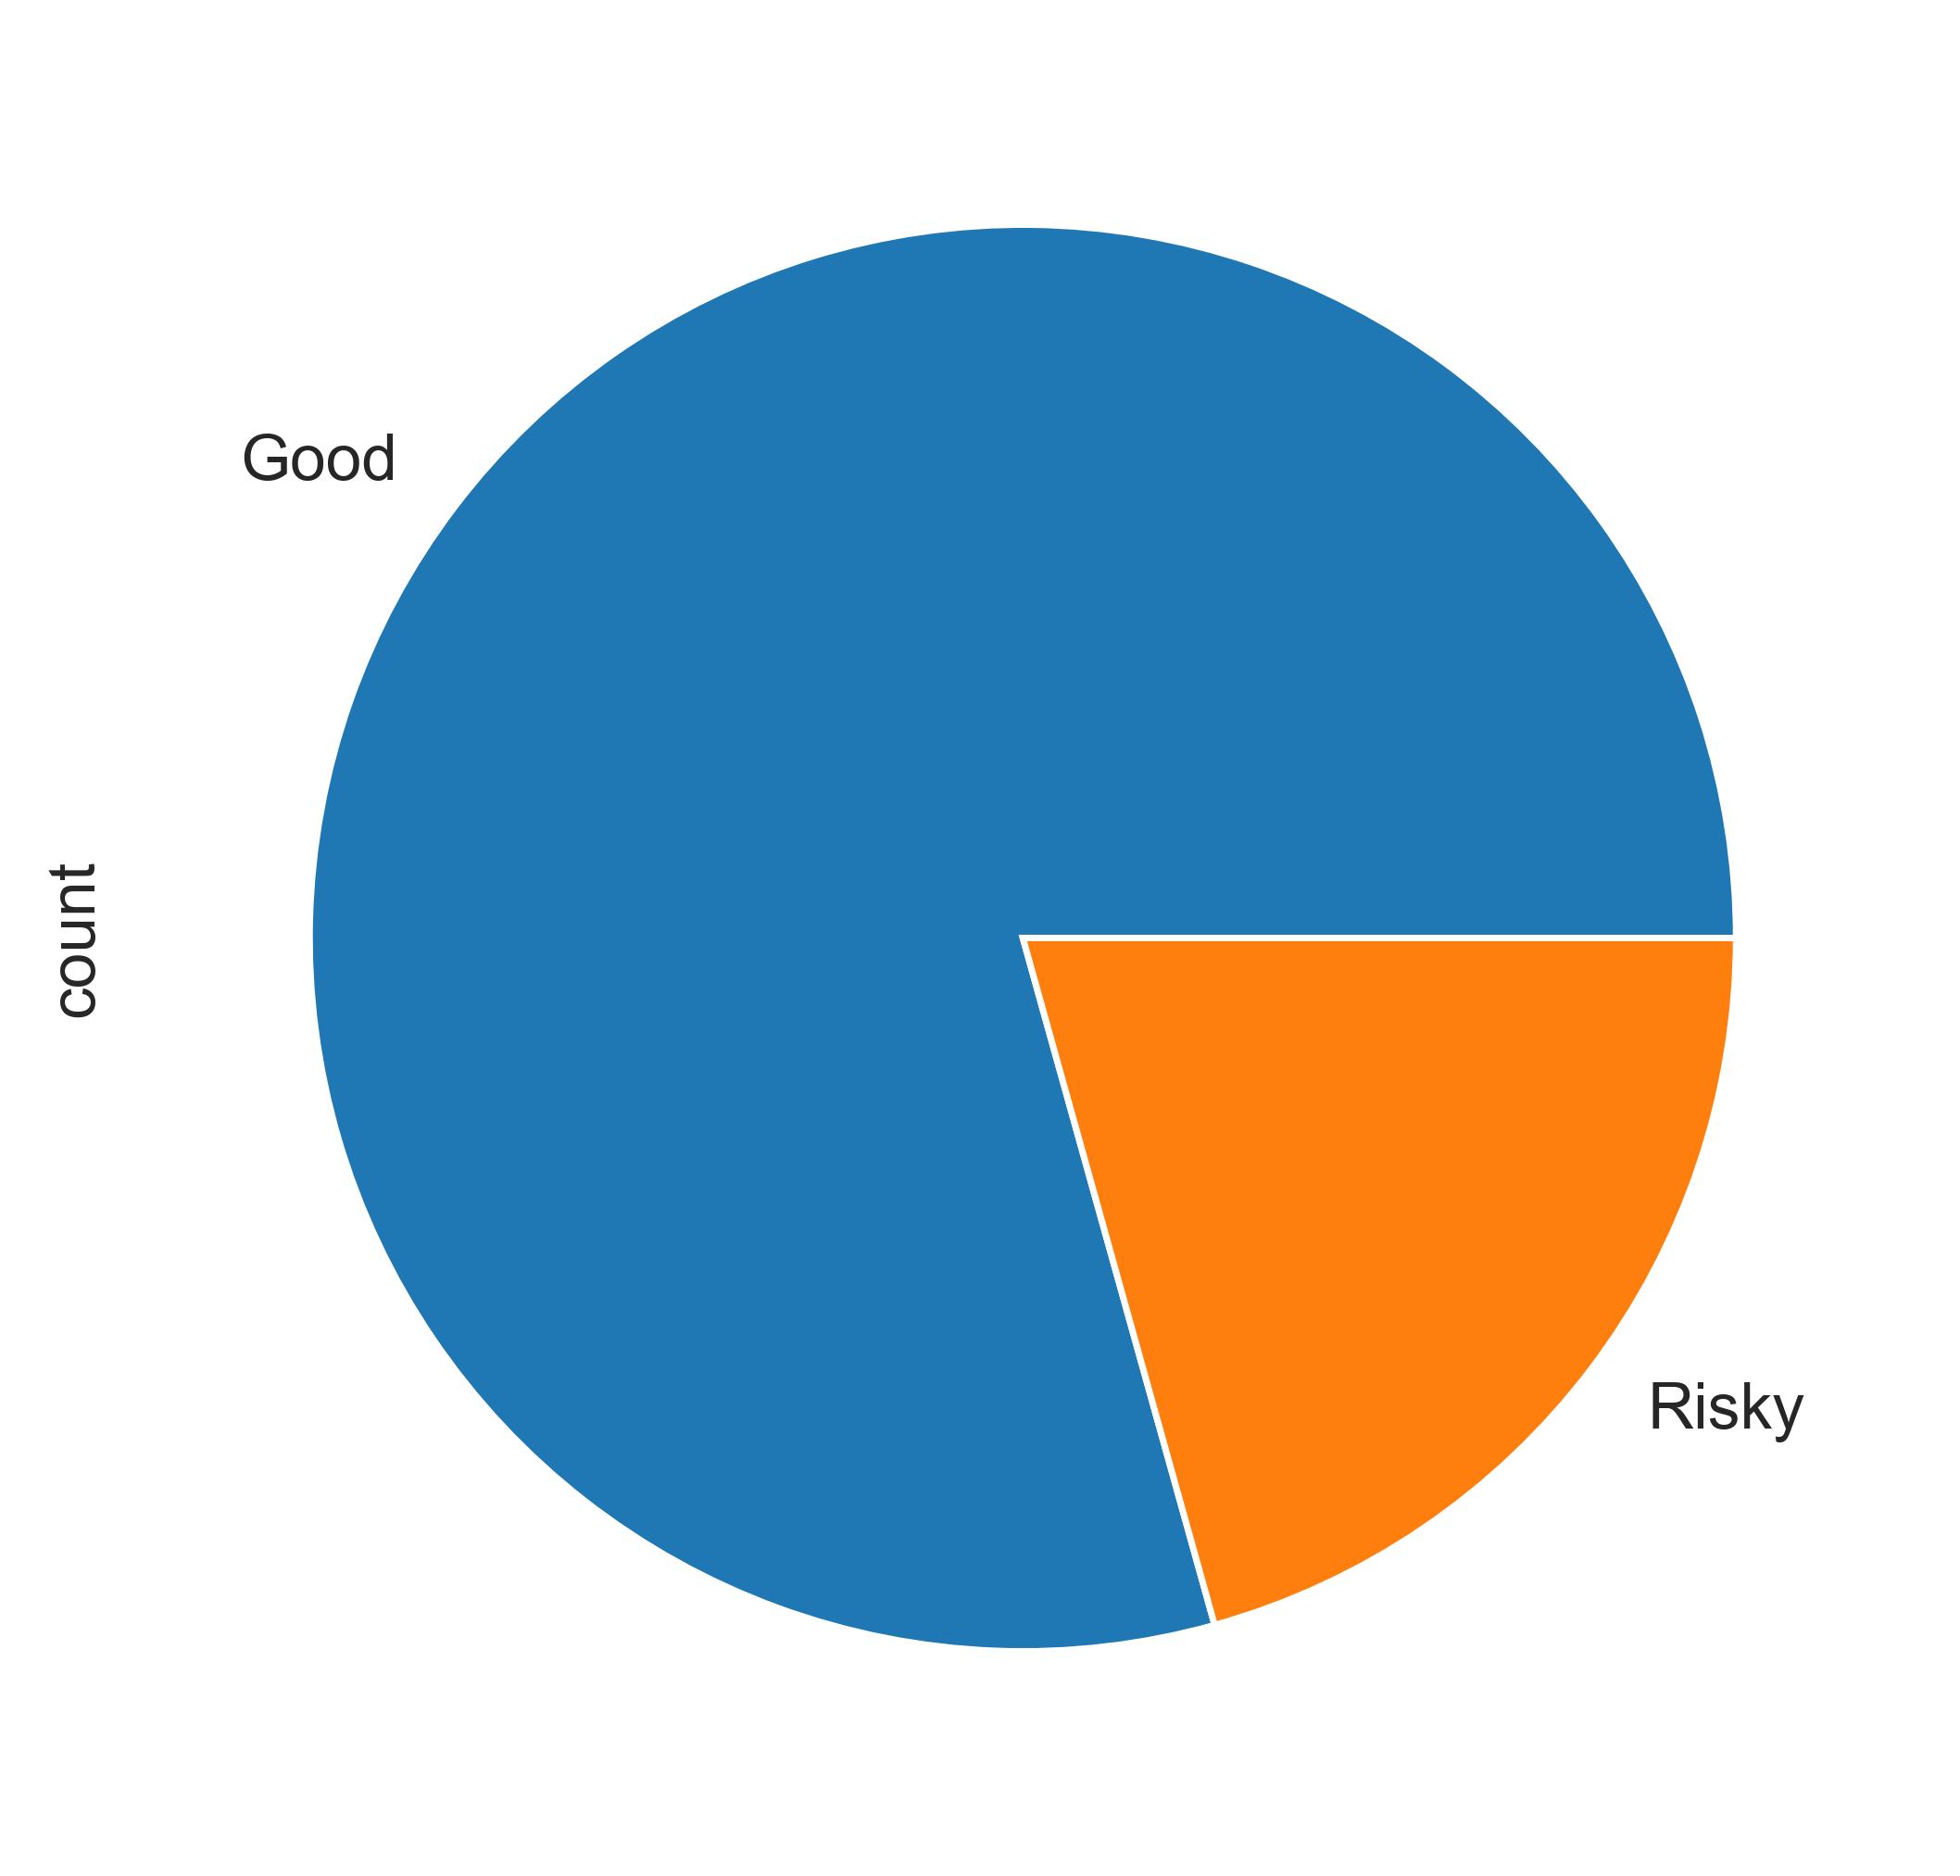

In [8]:
df['Target'].value_counts().plot(kind='pie')

<Axes: xlabel='TaxableIncome', ylabel='Count'>

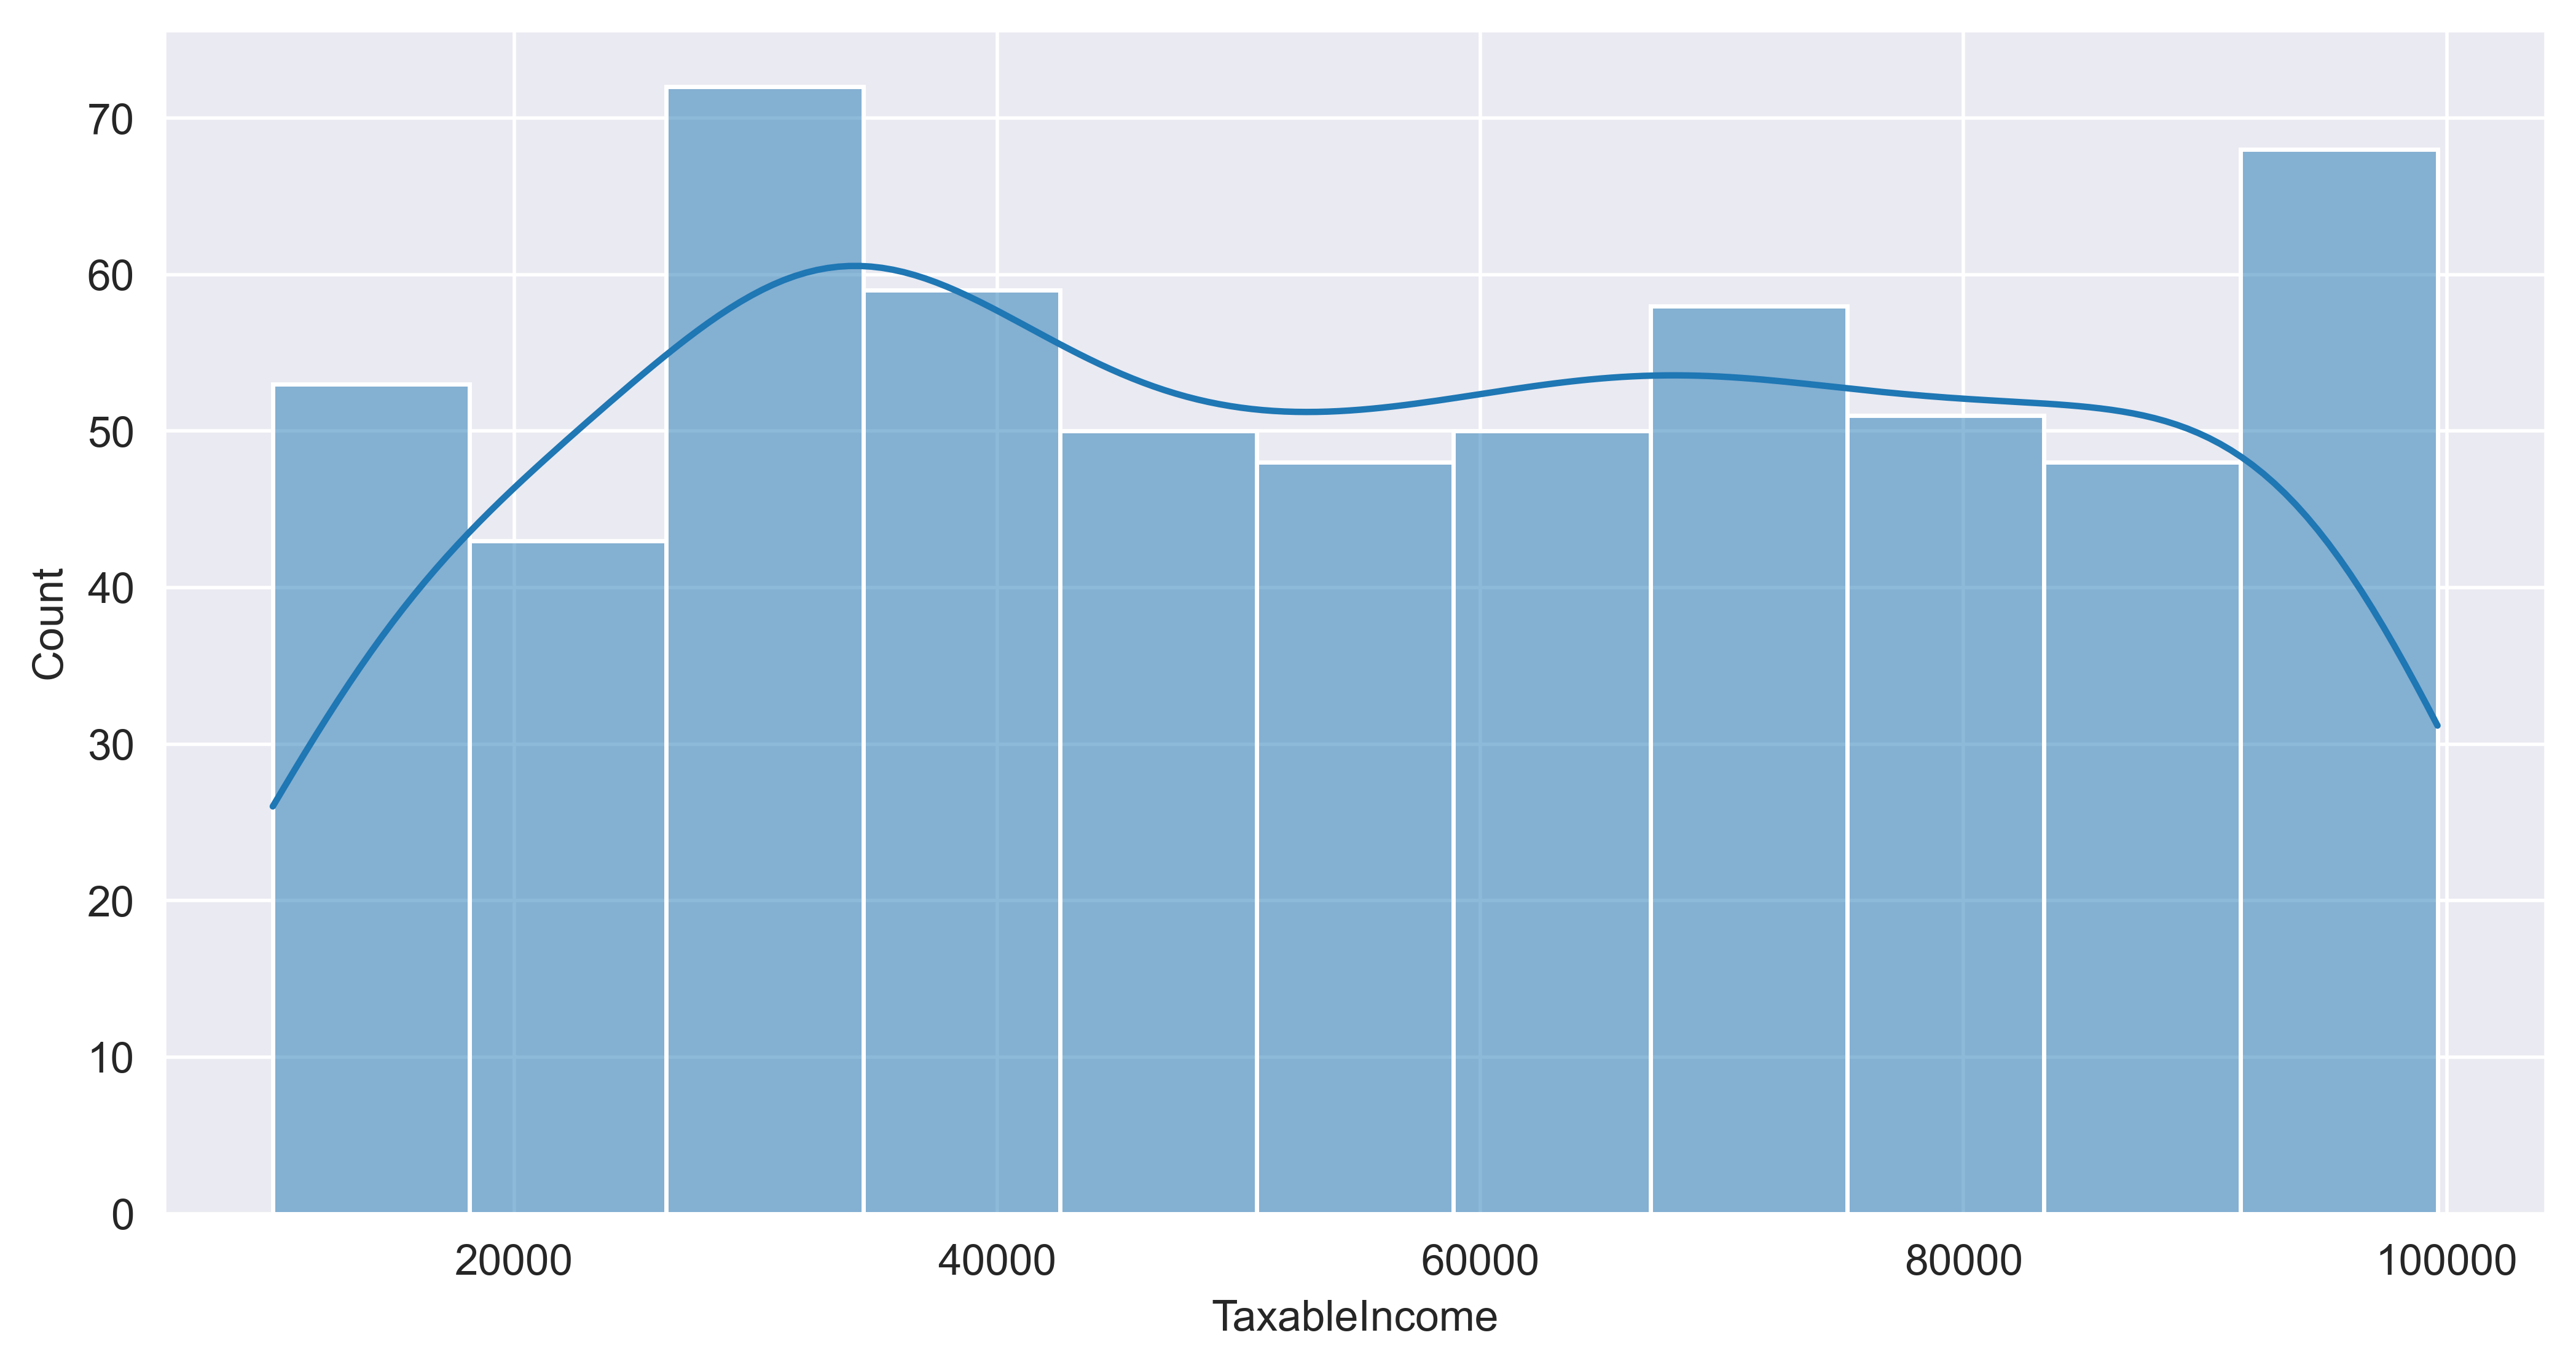

In [9]:
sns.histplot(df['TaxableIncome'],kde=True)

# 4 - Random Forest

*No need to perform scaling since Decision tree doesnot perform any distance calculation*

In [10]:
# split the feature and target
X = df.drop('Target',axis=1)
Y = df['Target']

In [11]:
oe = OrdinalEncoder()
X[['Undergrad','MaritalStatus','Urban']] = oe.fit_transform(X[['Undergrad','MaritalStatus','Urban']])

In [12]:
# split train test 
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

## 5 - Model

In [22]:
RF = RandomForestClassifier().fit(xtrain,ytrain)

In [24]:
print('Training accuracy: ', RF.score(xtrain,ytrain))
print('Testing Accuracy: ', RF.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  1.0


In [25]:
ypred = RF.predict(xtest)

In [26]:
print('\033[91m Train Report')
print(classification_report(ytrain,RF.predict(xtrain)))

 Train Report
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       382
       Risky       1.00      1.00      1.00        98

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [17]:
print('\033[92m Test Report')
print(classification_report(ytest,ypred))

 Test Report
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        94
       Risky       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [18]:
ypred

array(['Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Good',
       'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good',

Text(0.5, 1.0, 'Confusion Matrix')

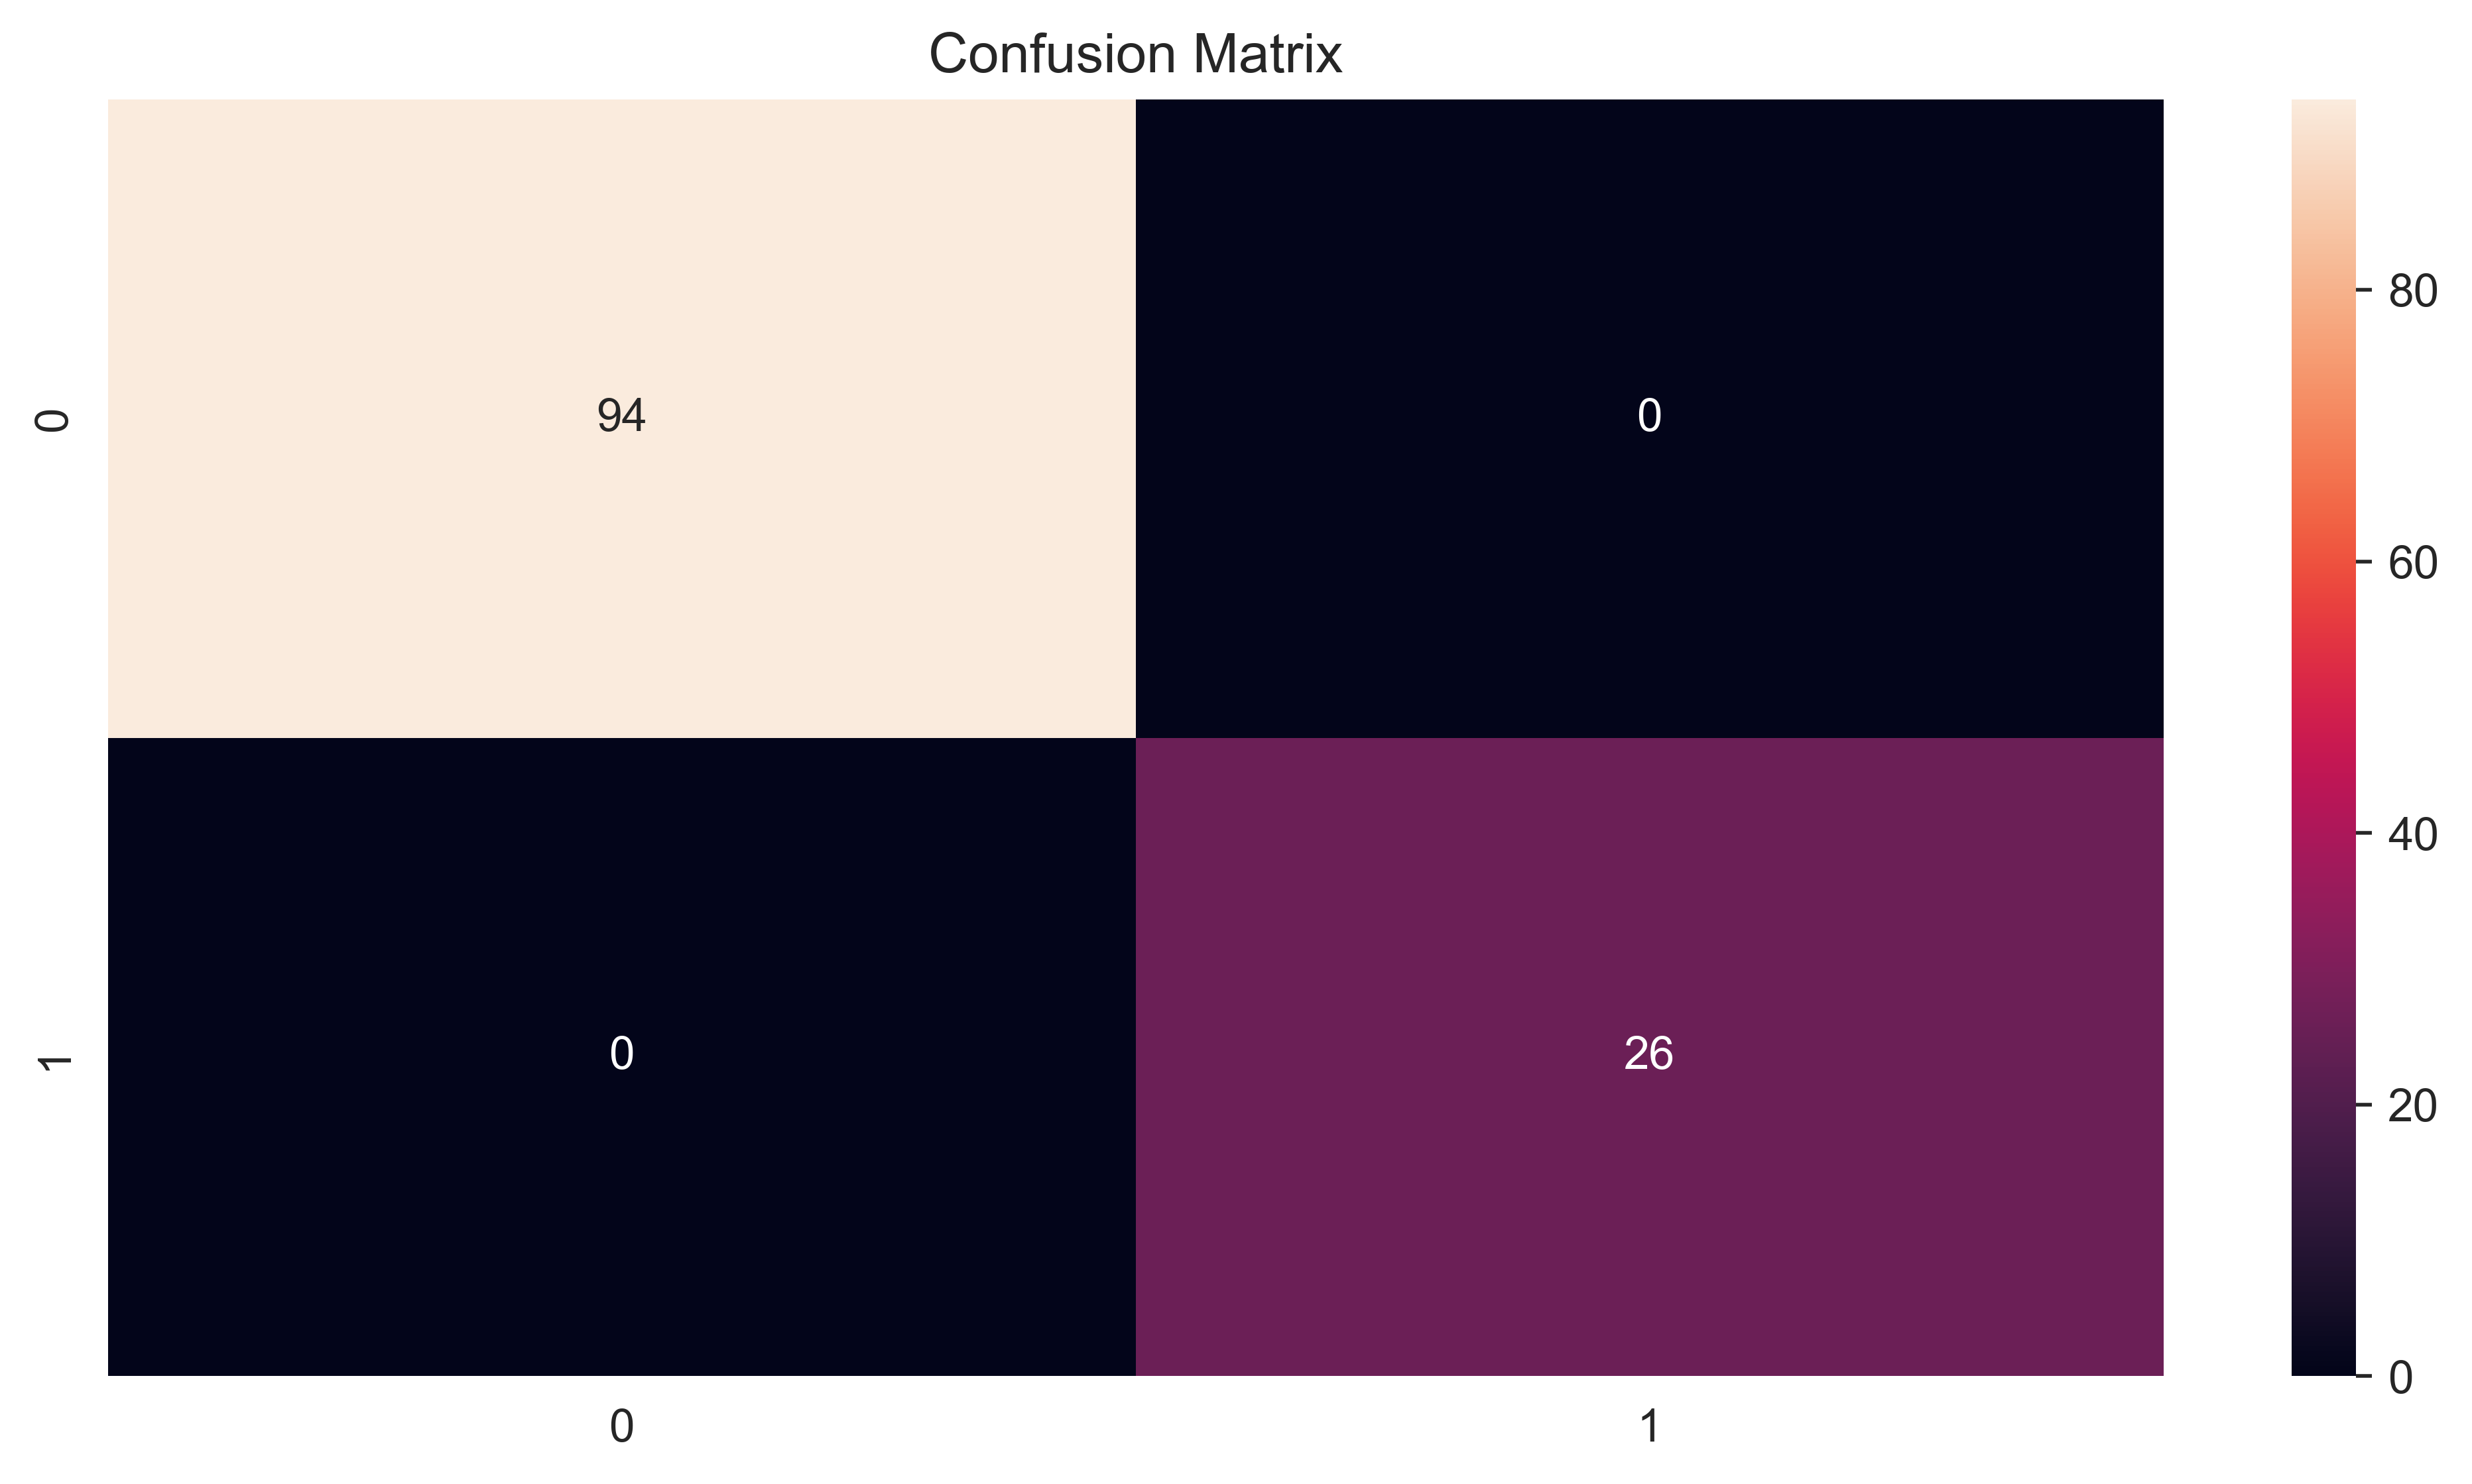

In [19]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)
plt.title('Confusion Matrix')

[Text(0.4444444444444444, 0.875, 'Urban <= 0.5\ngini = 0.342\nsamples = 298\nvalue = [375, 105]\nclass = Good'),
 Text(0.2222222222222222, 0.625, 'TaxableIncome <= 29940.0\ngini = 0.362\nsamples = 150\nvalue = [180, 56]\nclass = Good'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 38\nvalue = [0, 56]\nclass = Risky'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 112\nvalue = [180, 0]\nclass = Good'),
 Text(0.6666666666666666, 0.625, 'CityPopulation <= 52621.5\ngini = 0.321\nsamples = 148\nvalue = [195, 49]\nclass = Good'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 22\nvalue = [37, 0]\nclass = Good'),
 Text(0.7777777777777778, 0.375, 'TaxableIncome <= 30500.5\ngini = 0.361\nsamples = 126\nvalue = [158, 49]\nclass = Good'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 26\nvalue = [0, 49]\nclass = Risky'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 100\nvalue = [158, 0]\nclass = Good')]

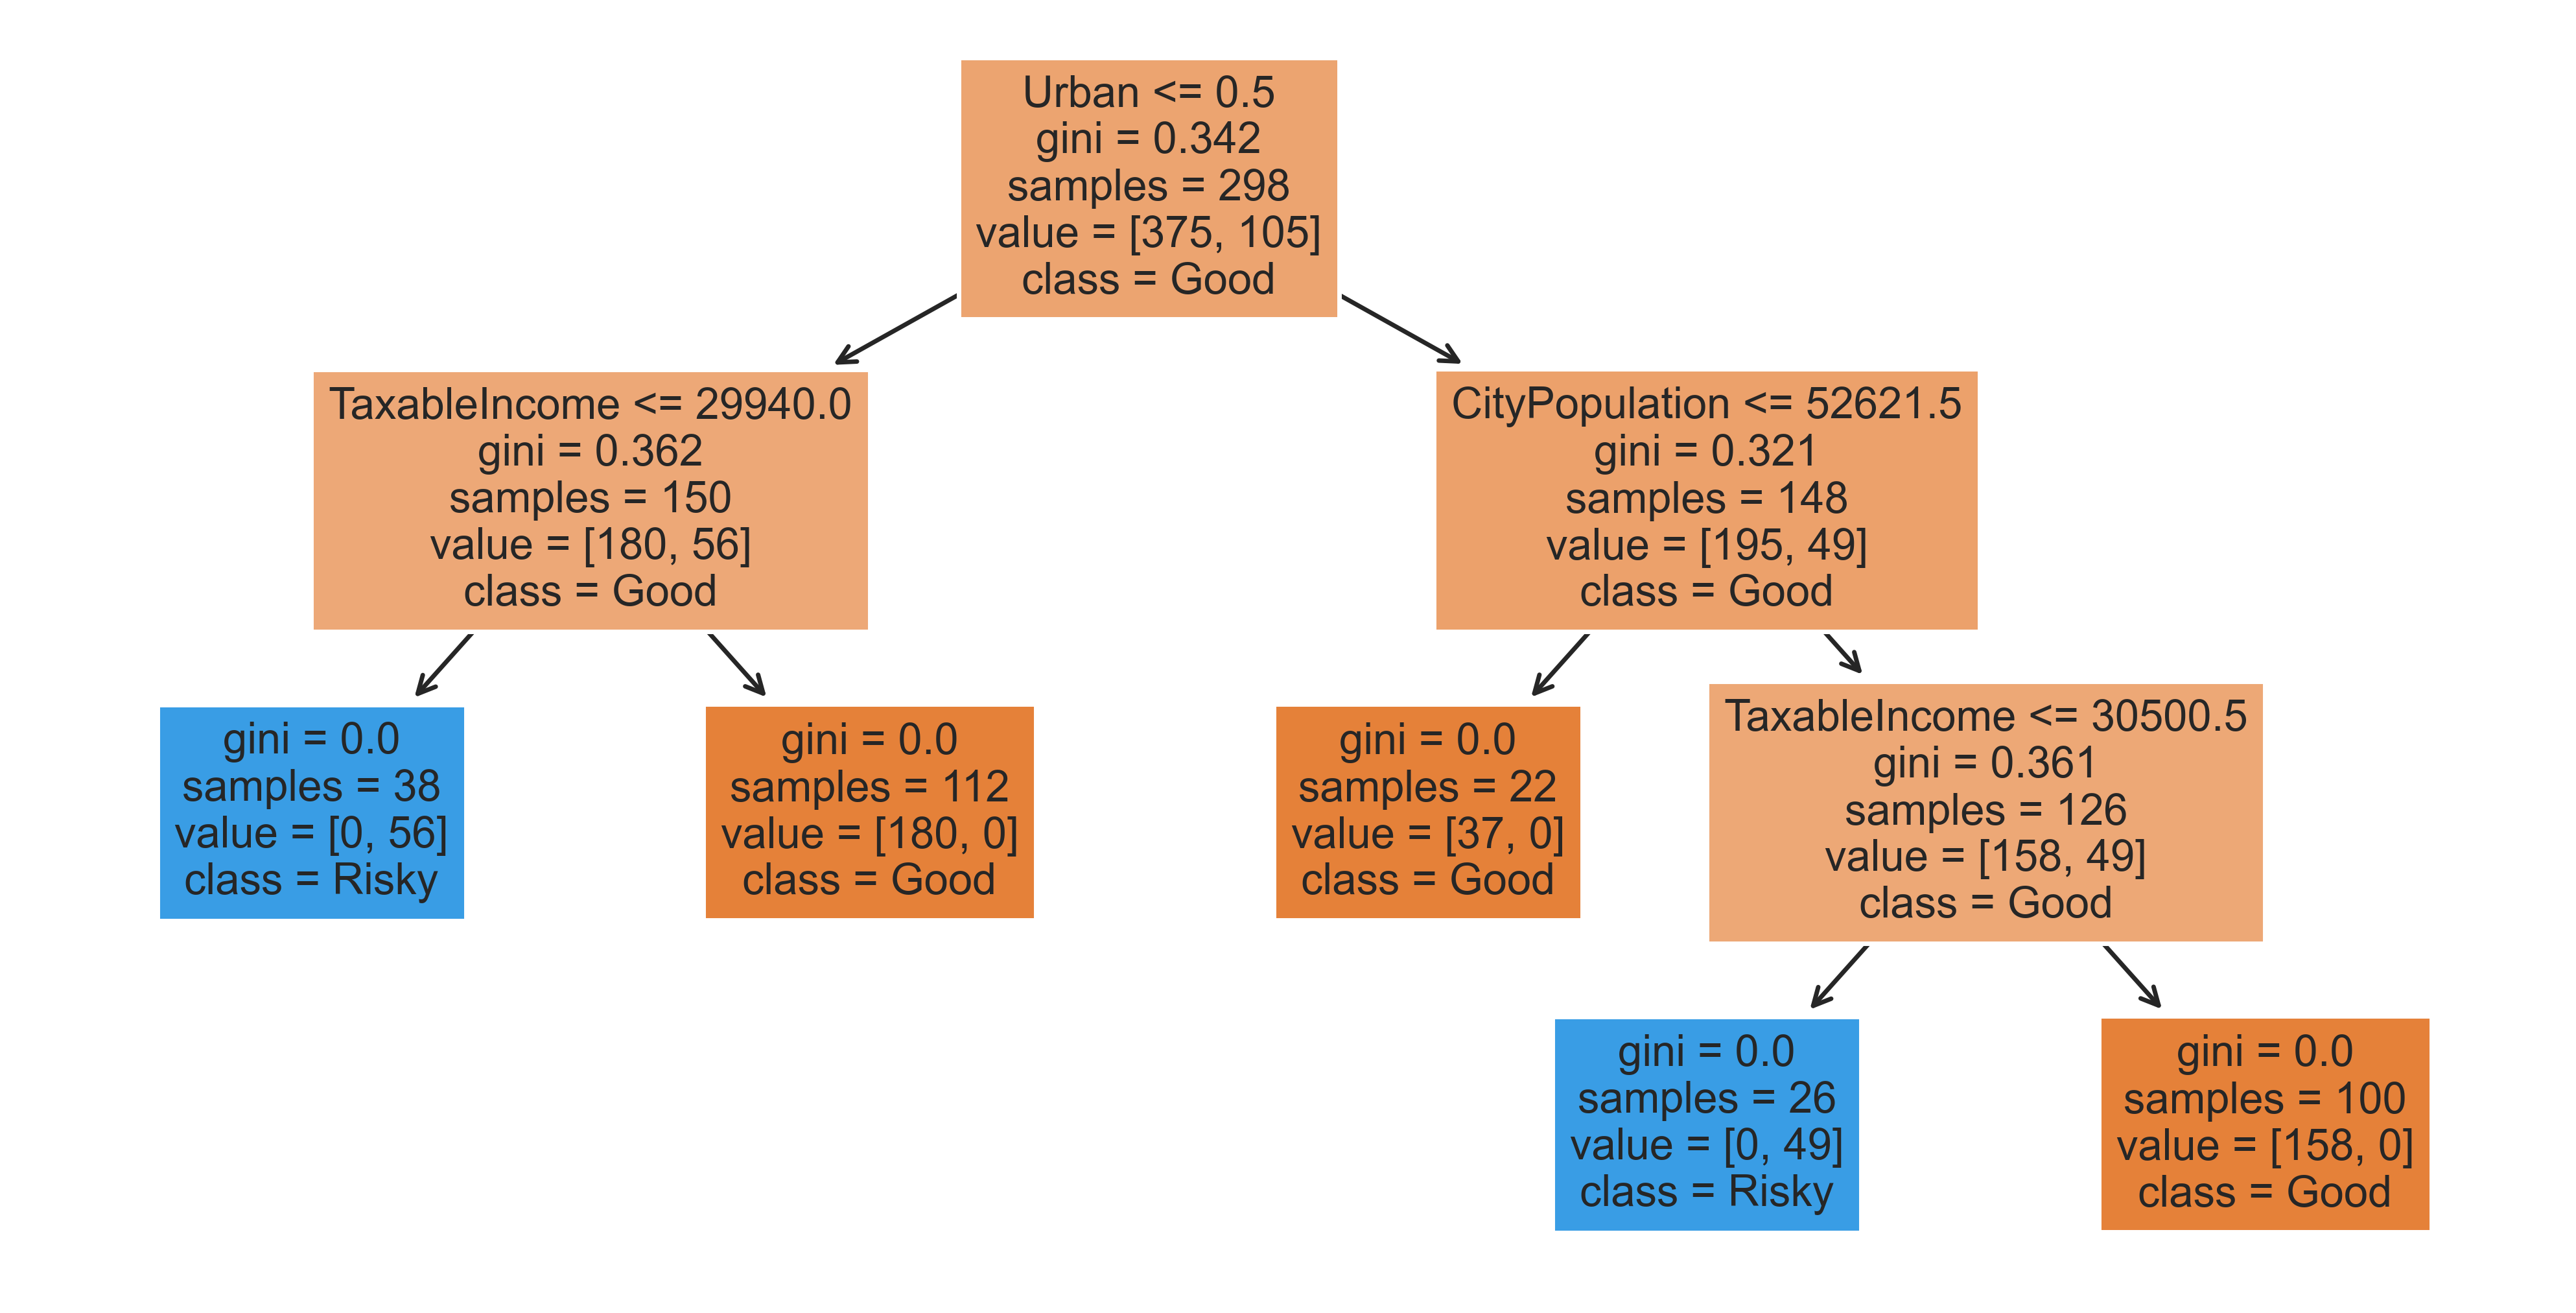

In [29]:
# This performs well lets visualize the tree
class_names_list = df['Target'].unique().tolist()
tree.plot_tree(RF.estimators_[0], feature_names=feature_names_list, class_names=class_names_list, filled=True)

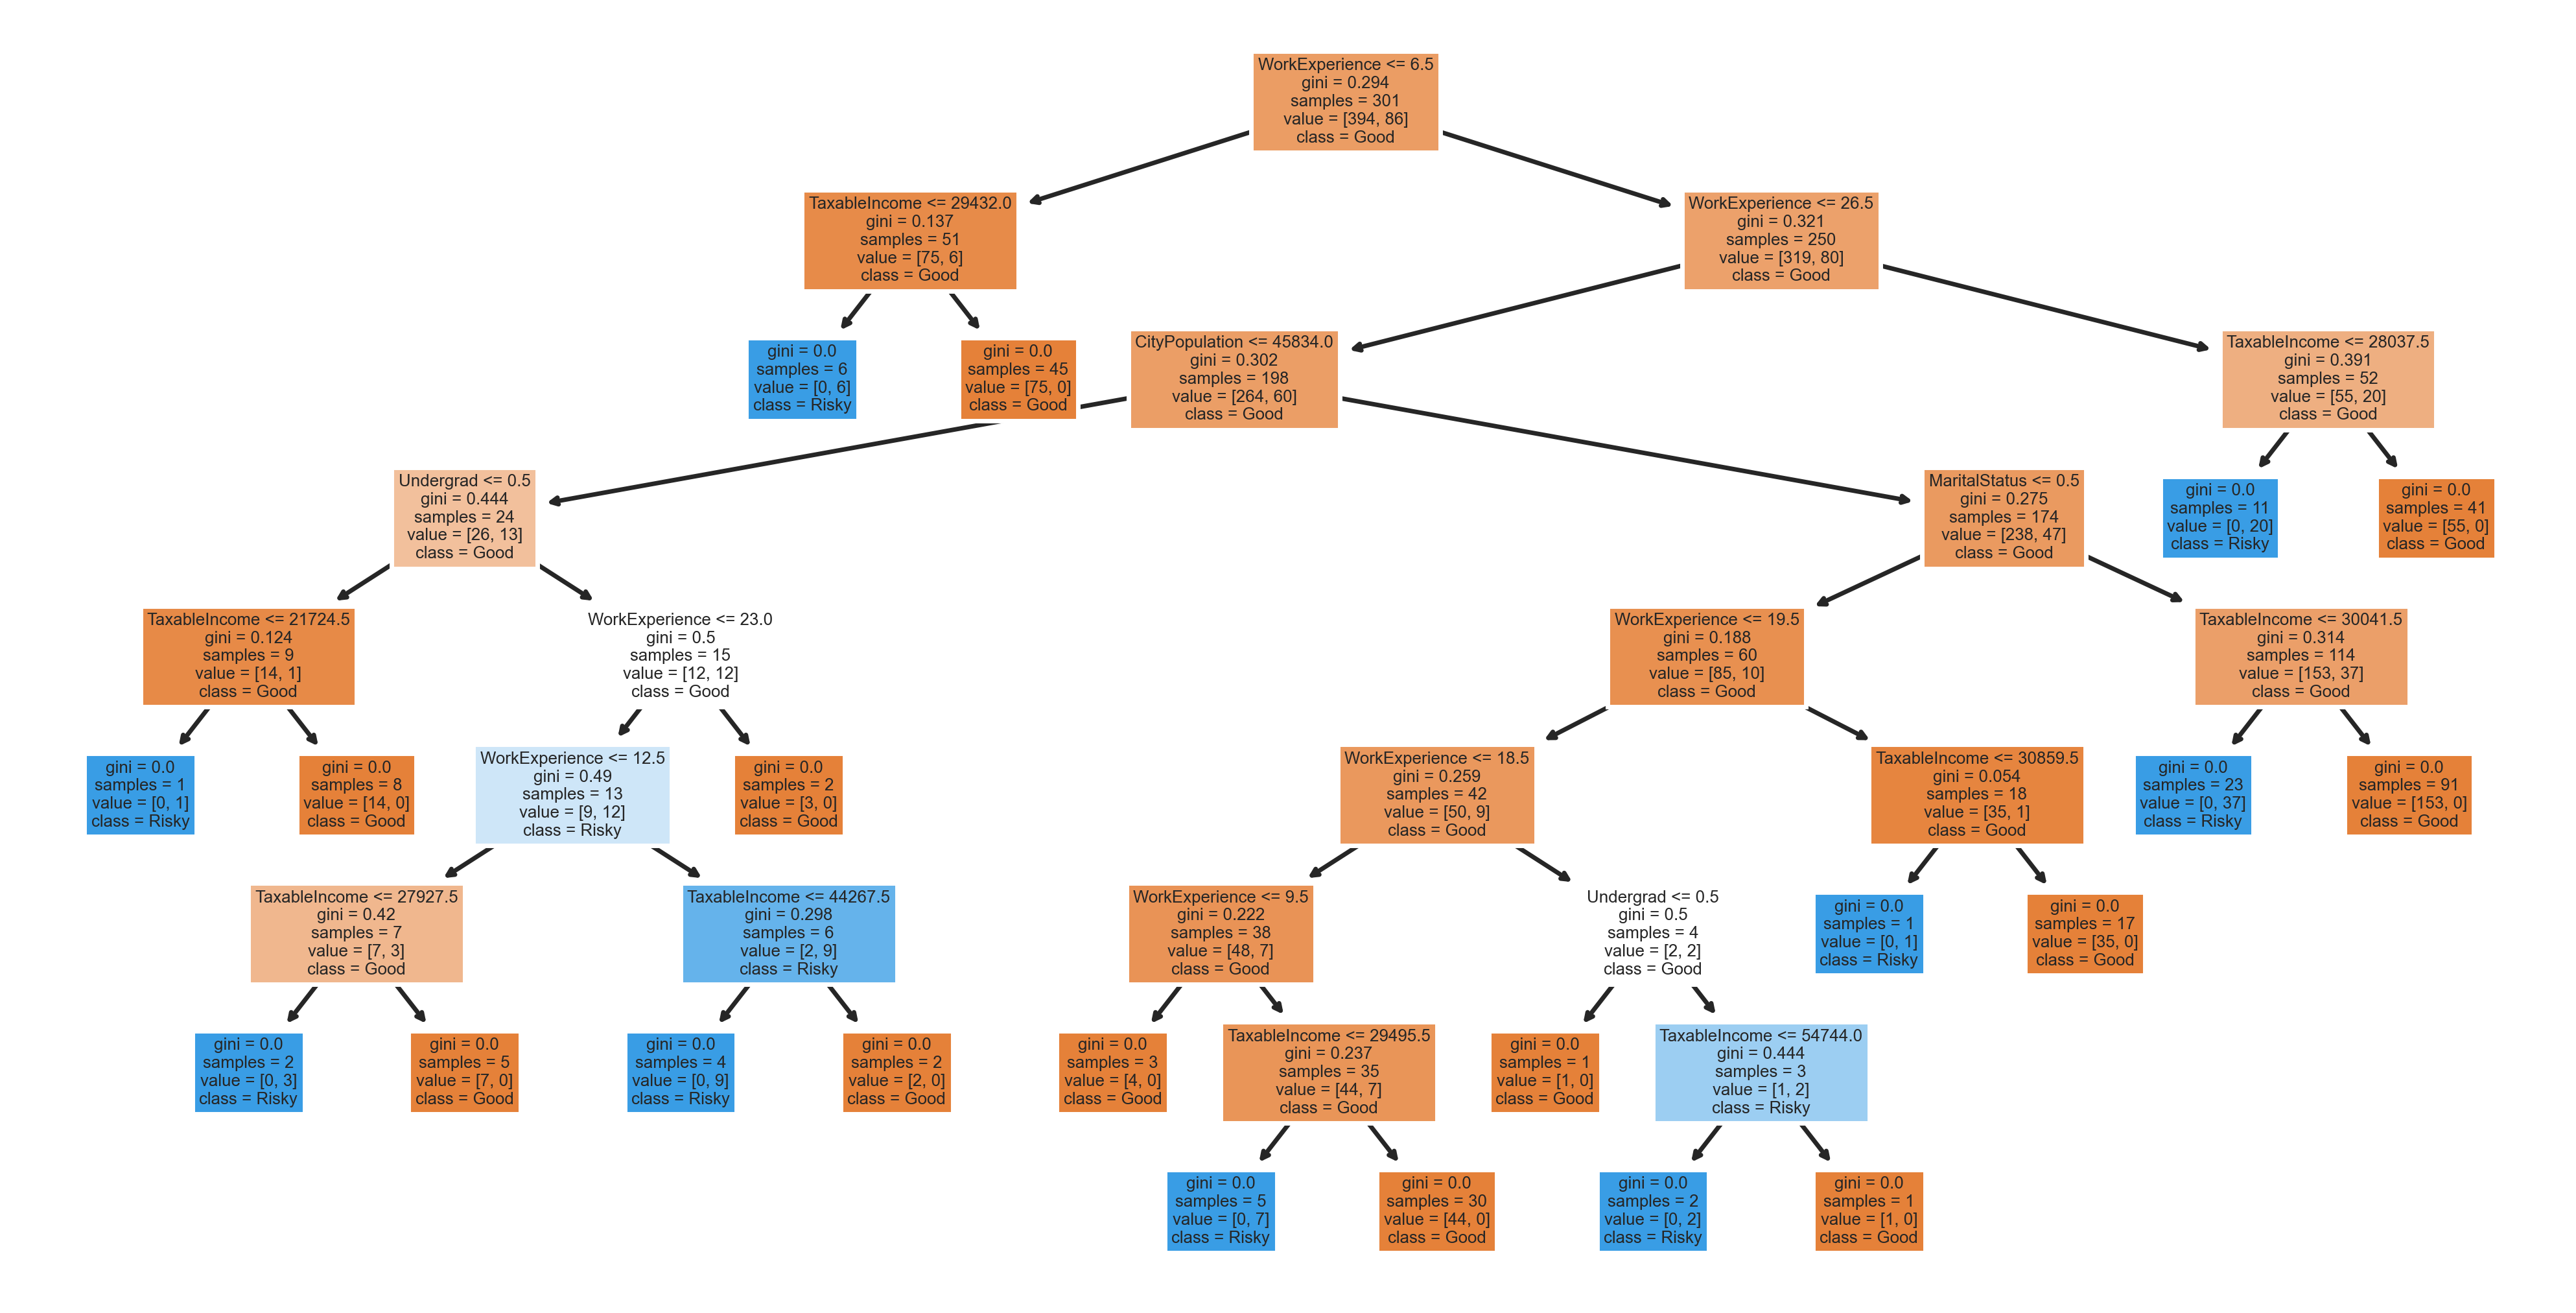

In [33]:
# This performs well lets visualize the tree
feature_names = X.columns.tolist()
class_names = df['Target'].unique().tolist()
tree.plot_tree(RF.estimators_[2], feature_names=feature_names, class_names=class_names, filled=True);


# 6 - Hyperparameter Tuning

*Our model performs well on both training and testing data*

In [34]:
params = {'n_estimators': [20,50,100,150,200,250],
         'criterion': ['log_loss','gini','entropy'],
         'max_depth' : [2,4,6,8,10,12,15,20]}
grid = GridSearchCV(RandomForestClassifier(),params,verbose=1).fit(xtrain,ytrain)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [35]:
grid.best_score_

0.9979166666666668

In [36]:
grid.best_params_

{'criterion': 'log_loss', 'max_depth': 2, 'n_estimators': 50}

<span style="color:blue; font-family: Arial;">Conclusion:</span>


<span style="color:blue; font-family: Arial;">The Above Parameter provides best combination of values for the Randomforest</span>